<a href="https://colab.research.google.com/github/Mehranmollanorozi/Adaboost/blob/main/Adaboost_Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
columns = [
    'Age', 'Workclass', 'Flnwgt', 'Education', 'Education-num', 'Marital-status',
    'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss',
    'Hours-per-week', 'Native-country', 'Income'
]

In [ ]:
data = pd.read_csv('adult.data', names=columns, sep=',\s', engine='python')
test_data = pd.read_csv('adult.test', names=columns, sep=',\s', engine='python', skiprows=1)

In [ ]:
data['Income'] = data['Income'].apply(lambda x: 1 if x == '>50K' else 0)
test_data['Income'] = test_data['Income'].apply(lambda x: 1 if x == '>50K.' else 0)


In [ ]:
categorical_columns = ['Workclass', 'Education', 'Marital-status', 'Occupation',
                       'Relationship', 'Race', 'Sex', 'Native-country']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

In [ ]:
missing_cols = set(data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[data.columns]

In [ ]:
X_train = data.drop('Income', axis=1)
y_train = data['Income']

X_test = test_data.drop('Income', axis=1)
y_test = test_data['Income']

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)  # مدل پایه
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost model: {accuracy * 100:.2f}%")

Accuracy of AdaBoost model: 85.65%


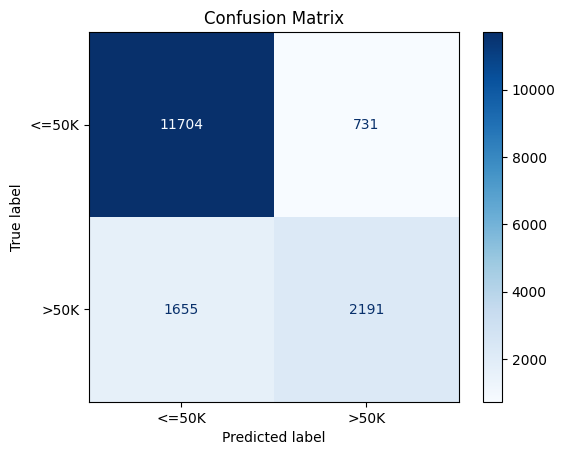

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['<=50K', '>50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance_df.head(10))


Top 10 Important Features:
                              Feature  Importance
3                        Capital-gain    0.293011
30  Marital-status_Married-civ-spouse    0.218585
0                                 Age    0.146462
2                       Education-num    0.109868
4                        Capital-loss    0.081548
5                      Hours-per-week    0.058754
39         Occupation_Farming-fishing    0.024701
51             Relationship_Own-child    0.018936
42           Occupation_Other-service    0.013471
38         Occupation_Exec-managerial    0.012726
